### 문제.  다음 셀에 우리가 배운 데이터시각화 라이브러리 두 가지, 데이터 분석 라이브러리, 수학 연산 라이브러리를 약어별칭(alias)과 함께 불러오세요.

In [1]:
# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분석 라이브러리
import pandas as pd 

# 수학 연산 라이브러리
import numpy as np

### 문제. finaltaskdata.csv 파일을 msleep 이라는 데이터 프레임으로 불러오세요. 

In [2]:
import os 

# os 패키지의 getcwd() 함수로 현재 경로 가져오기
msleep = pd.read_csv(os.getcwd() + "/finaltaskdata.csv")

### 문제. 데이터 앞부분 10개 행을 확인하세요.

In [3]:
msleep.head(10)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,-1.00000,0.045
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,-3.0,NaN,NaN,21.0,0.09820,14.800


### 문제.  데이터에 대한 전반적인 정보를 확인하세요.

In [4]:
# 판다스 데이터 확인; 데이터에 대한 전반적인 정보 확인 df.info() 메소드
msleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       57 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


### 문제.  데이터의 칼럼명을 확인하세요.

In [5]:
# 판다스 데이터 확인; df.columns 속성
msleep.columns

Index(['name', 'genus', 'vore', 'order', 'conservation', 'sleep_total',
       'sleep_rem', 'sleep_cycle', 'awake', 'brainwt', 'bodywt'],
      dtype='object')

### 문제. brainwt과 bodywt 칼럼명을 brain_weight과 body_weight으로 변경하고 다시 칼럼명을 확인하세요.

In [6]:
# 판다스 데이터 가공; df.rename() 메소드로 기존칼럼명:새칼럼명 딕셔너리 구조로 정의하여
# 칼럼명 바꿔주기. 이때 변경사항을 데이터프레임에 반영하기 위해 inplace=True
msleep.rename(columns= {'brainwt':'brain_weight',
                       'bodywt':'body_weight'}, inplace=True)

In [7]:
msleep.columns

Index(['name', 'genus', 'vore', 'order', 'conservation', 'sleep_total',
       'sleep_rem', 'sleep_cycle', 'awake', 'brain_weight', 'body_weight'],
      dtype='object')

### 문제.  데이터의 칼럼별 요약통계량을 확인하세요.

In [8]:
# 판다스 데이터 확인; 데이터의 칼럼별 요약 통계량 df.describe() 메소드
msleep.describe()

,sleep_total,sleep_rem,sleep_cycle,awake,brain_weight,body_weight
count,83.000000,61.000000,32.000000,83.000000,57.000000,83.000000
mean,10.361446,1.875410,0.439583,13.567470,0.259098,166.136349
std,4.618146,1.298288,0.358680,4.452085,0.982433,786.839732
min,-3.000000,0.100000,0.116667,4.100000,-1.000000,0.005000
25%,7.850000,0.900000,0.183333,10.250000,0.002600,0.174000
50%,10.100000,1.500000,0.333333,13.900000,0.012300,1.670000
75%,13.750000,2.400000,0.579167,16.150000,0.115000,41.750000
max,19.900000,6.600000,1.500000,22.100000,5.712000,6654.000000


### 문제. 요약통계량에서 음수가 있는지 확인한 것을 바탕으로 이상치가 있는 칼럼의 이상치를 제거하고, 해당 칼럼의 최소값을 확인하세요.

In [9]:
# sleep_total, brain_weight 칼럼은 모두 음수가 나올 수 없는 칼럼인데 min에 음수 존재
# 두 칼럼 모두 음수인 행은 결측치로 간주하여 제거
msleep = msleep[(msleep['sleep_total'] >= 0)]
# sleep_total 칼럼의 최소값 확인
msleep['sleep_total'].min()

1.9

In [10]:
msleep = msleep[(msleep['brain_weight'] >= 0)]
# brain_weight 칼럼의 최소값 확인
msleep['brain_weight'].min()

0.00014

### 문제. conservation status의 고유값별 빈도를 다음과 같이 확인하세요.

In [11]:
# 판다스 데이터 확인; 범주형 칼럼의 빈도분석 df.value_counts() 메소드
msleep['conservation'].value_counts()

lc              18
domesticated    10
en               3
vu               2
nt               2
Name: conservation, dtype: int64

### 문제. 멸종 위기가 높은 순서대로 아래와 같이 값을 변경하고 다시 고유값별 빈도를 확인하세요.
- en => 1_endangered
- vu => 2_vulnerable
- nt => 3_near_threatened
- lc => 4_least_concern
- domesticated => 5_domesticated

In [12]:
# map과 dictionary를 이용해 기존의 conservation 칼럼의 고유값 이름 변경
msleep['conservation'] = msleep['conservation'].map({'en':'1_endangered',
                                                    'vu':'2_vulnerable',
                                                    'nt':'3_near_threatened',
                                                    'lc':'4_least_concern',
                                                    'domesticated':'5_domesticated'})

# 변경된 고유값별 빈도 확인
msleep['conservation'].value_counts()

4_least_concern      18
5_domesticated       10
1_endangered          3
2_vulnerable          2
3_near_threatened     2
Name: conservation, dtype: int64

### 문제.  칼럼별 결측치의 개수를 한번에 확인해보세요.

In [13]:
# 판다스 결측 데이터 처리; df.isnull().sum()으로 칼럼별 결측치 개수 확인
msleep.isnull().sum()

name             0
genus            0
vore             5
order            0
conservation    20
sleep_total      0
sleep_rem        7
sleep_cycle     25
awake            0
brain_weight     0
body_weight      0
dtype: int64

### 문제. 식성(vore) 변수에 대해서 결측치들을 "unknown"으로 대체하여 재할당하세요. 해당 칼럼의 고유값별 빈도를 다음과 같이 확인하세요.

In [14]:
# 판다스 결측 데이터 처리; df.fillna() 메소드로 결측 데이터 대체하기
# 이때 변경사항을 데이터프레임에 반영하기 위해 inplace=True
msleep['vore'].fillna('unknown', inplace=True)

### 문제. 총수면량의 극단치를 확인해보세요.

<AxesSubplot:xlabel='sleep_total'>

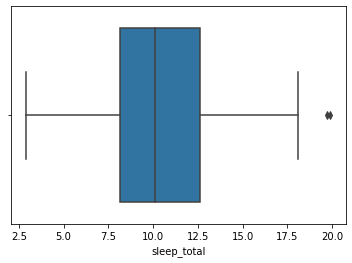

In [15]:
# seaborn의 boxplot을 활용해 극단치 눈으로 확인
sns.boxplot(x = msleep['sleep_total'])

### 문제. 총수면량의 극단치를 제거하고, 다시 확인해보세요.
- 복사본을 만들 필요는 없습니다.

<AxesSubplot:xlabel='sleep_total'>

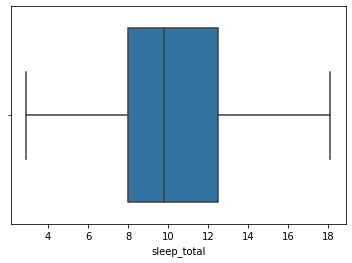

In [16]:
# numpy의 percentile 함수를 이용해 사분위수를 직접 계산해 극단치 구해야 함

q1 = np.percentile(msleep['sleep_total'], 25) # 1사분위수
q3 = np.percentile(msleep['sleep_total'], 75) # 3사분위수
iqr = q3 - q1
upper_bound = q3 + (iqr * 1.5) # 극단치 제거 위한 범위 설정

# 극단치를 벗어나는 값 제거
msleep = msleep[msleep['sleep_total'] <= upper_bound]

sns.boxplot(x = msleep['sleep_total'])
# 극단치 제거 확인

### 문제. 총수면량에서 렘수면량을 제외한 비렘수면량(sleep_nonrem)을 파생변수로 만들어 추가보세요.

In [17]:
# 새로운 파생변수 sleep_nonrem 칼럼 추가
msleep['sleep_nonrem'] = msleep['sleep_total'] - msleep['sleep_rem']

### 문제. 총수면량과 렘수면량, 비렘수면량에 대해서 분단위(in hours to minutes)로 계산된 파생변수를 각각 만들어 추가해보세요.(기존 변수명 뒤에 '_min'을 붙이세요)
- msleep 데이터 안에 파생변수가 존재하도록 진행해야 됩니다.

In [18]:
# X60 해서 min 단위 파생변수 추가
msleep['sleep_total_min'] = msleep['sleep_total'] * 60
msleep['sleep_rem_min'] = msleep['sleep_rem'] * 60
msleep['sleep_nonrem_min'] = msleep['sleep_nonrem'] * 60

### 문제. 식성(육/초/충/잡/모름)별로 총수면량(시간단위)의 평균을 출력해보세요.
- 그룹으로 묶은 뒤 해당하는 칼럼만 추출하여 진행하도록 하세요. 마찬가지로 한줄로 작성하도록 합니다.

In [19]:
# df.groupby() 메소드로 vore(식성)별로 묶고
# mean() 메소드로 각 그룹별 평균을 구한다
# 이때 궁금한 칼럼은 sleep_total이므로 해당 칼럼만 추출
msleep.groupby('vore').mean()['sleep_total']

vore
carni      10.688889
herbi       8.110526
insecti    11.700000
omni       11.105882
unknown    10.560000
Name: sleep_total, dtype: float64

### 문제. 아래의 표는 멸종 위협에 대해서 High와 Low, Non으로 구분한 표입니다. red_list라는 데이터 프레임으로 만들어보세요. 
```python
conservation               risk

1_endangered               high
2_vulnerable               high
3_near_threatened          low
4_least_concern            low
5_domesticated             non
unknown                    non
```
- 상단의 칼럼명(변수명)은 데이터에 입력할 필요는 없습니다.

In [20]:
# pd.DataFrame()으로 데이터프레임 생성, 딕셔너리 활용하여 칼럼별 데이터 넣어주기
red_list = pd.DataFrame({'conservation':['1_endangered', '2_vulnerable', '3_near_threatened', '4_least_concern', '5_domesticated', 'unknown'],
                        'risk':['high', 'high', 'low', 'low', 'non', 'non']})

red_list

,conservation,risk
0,1_endangered,high
1,2_vulnerable,high
2,3_near_threatened,low
3,4_least_concern,low
4,5_domesticated,non
5,unknown,non


### 문제. red_list 데이터 프레임을 활용하여 msleep 데이터에 risk 라는 변수가 추가되도록 재할당하세요. 데이터 앞부분을 확인해보세요.
- 적절하게 병합하여 파생변수가 생성되는 것과 같이 추가되도록 하세요.

In [26]:
# merge() 함수로 병합, conservation 칼럼을 기준으로(on = 'conservation') 병합
# 따라서 msleep 데이터를 기준으로 red_list를 병합하여 새로운 파생변수 risk 칼럼을 추가하고 싶은 것이므로 how = 'left' 옵션으로 병합
# on 옵션을 따로 지정해 주지 않아도 공통 칼럼인 'conservation'을 기준으로 병합된다

msleep = pd.merge(msleep, red_list, how = 'left')
msleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brain_weight,body_weight,sleep_nonrem,sleep_total_min,sleep_rem_min,sleep_nonrem_min,risk
0,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,15.2,1020.0,108.0,912.0,NaN
1,Greater short-tailed shrew,Blarina,omni,Soricomorpha,4_least_concern,14.9,2.3,0.133333,9.1,0.00029,0.019,12.6,894.0,138.0,756.0,low
2,Cow,Bos,herbi,Artiodactyla,5_domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000,3.3,240.0,42.0,198.0,non
3,Dog,Canis,carni,Carnivora,5_domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000,7.2,606.0,174.0,432.0,non
4,Goat,Capri,herbi,Artiodactyla,4_least_concern,5.3,0.6,NaN,18.7,0.11500,33.500,4.7,318.0,36.0,282.0,low


### 문제. 멸종 위기(risk)가 높은지 낮은지 없는지에 따라 깨어있는 시간(awake) 분포를 막대그래프로 다음과 같이 출력해보세요.
- 투명도는 멸종 위기가 높은 경우 0.7, 낮은 경우 0.5, 없는 경우 0.3으로 지정하세요.

In [28]:
# risk 칼럼 값별 데이터프레임 생성
high_risk = msleep[msleep['risk'] == 'high']
low_risk = msleep[msleep['risk'] == 'low']
non_risk = msleep[msleep['risk'] == 'non']

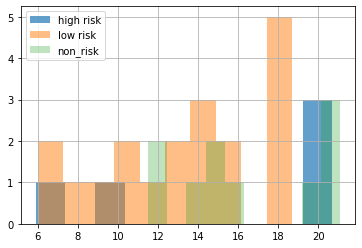

In [29]:
# awake 칼럼에 대한 히스토그림 그리기
# alpha 파라미터로 투명도 지정, label 파라미터로 범례 지정
high_risk['awake'].hist(alpha = 0.7, label = 'high risk')
low_risk['awake'].hist(alpha = 0.5, label = 'low risk')
non_risk['awake'].hist(alpha = 0.3, label = 'non_risk')

plt.legend() # 범례
plt.show()